In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


# <h1 align="center">Trending Indian YouTube video Analysis </h1>

<div style="text-align:center">
    <img src="https://user-images.githubusercontent.com/79428102/120029168-9334f900-bfaa-11eb-8918-7aff6e045802.png" alt="Image" />
</div>

In [2]:
df=pd.read_csv("/kaggle/input/youtube-new/INvideos.csv")

# Data Understanding 

In [3]:
df.shape

(37352, 16)

In [4]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [ ]:
df.sample(10)

In [6]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print(null_values)

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64


### Insight:
- The dataset contains 37,352 rows and 16 columns.

- The only column with null values (561) is the "description" column.

# Data Preprocessing

In [7]:
import pandas as pd

# Assuming your original DataFrame is named 'df'

# Convert 'trending_date' column to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Convert 'publish_time' column to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Verify the changes
print(df[['trending_date', 'publish_time']].dtypes)


trending_date         datetime64[ns]
publish_time     datetime64[ns, UTC]
dtype: object


In [8]:
df.sample(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
3752,yyXUkVGsljY,2017-12-03,"Muddha Mandaram - Episode 944 - December 2, 2...",zeetvtelugu,24,2017-12-02 01:32:15+00:00,"zee telugu|""Muddha Mandaram""|""full episode""|""t...",114073,197,24,12,https://i.ytimg.com/vi/yyXUkVGsljY/default.jpg,False,False,False,http://www.ozee.com/shows/muddha-mandaram - Cl...
18761,SwLRj1m8EAk,2018-02-25,ತಾಯಿ ಮಗಳು ಒಬ್ಬನನ್ನೇ ಪ್ರೀತಿಸಿದರು ಕೊನೆಗೆ ಏನಾಯ್ತು...,chandanavana,24,2018-02-24 09:27:08+00:00,"kannada latest news|""channai incident in kanna...",39702,57,43,3,https://i.ytimg.com/vi/SwLRj1m8EAk/default.jpg,False,False,False,Chennai manjula Love Story Explained in Kannada.
12393,1OyKl6p0jIY,2018-01-20,OFFICIAL! Vijay 62 starts shooting | Keerthi S...,IndiaGlitz Tamil Movies | Interviews | Shootin...,24,2018-01-19 07:32:21+00:00,"tamil movie|""tamil comedy""|""kollywood""|""tamil ...",90223,3727,211,364,https://i.ytimg.com/vi/1OyKl6p0jIY/default.jpg,False,False,False,It's official! It's a possible Thalapathy Diwa...
3846,Sfv6Zzx_15I,2017-12-04,Jeeju ( Teaser )| Miss Pooja Ft.Harish Verma |...,Speed Records,10,2017-12-02 14:25:18+00:00,"punjabi songs|""punjabi bhangra""|""punjabi music...",253035,6093,126,532,https://i.ytimg.com/vi/Sfv6Zzx_15I/default.jpg,False,False,False,Teaser - Jeeju\nArtist - Miss Pooja Ft Harish ...
21630,vV6J2aSypvA,2018-03-14,LOL! Watch what angry husband did to wife's pr...,Kaumudy,23,2018-03-12 05:00:01+00:00,"omg|""funny""|""prank""|""ohmygod""|""kaumudytv""|""kau...",491282,2268,709,536,https://i.ytimg.com/vi/vV6J2aSypvA/default.jpg,False,False,False,Subscribe for More videos : https://goo.gl/TJ4...
35640,jJCa2U0LLxQ,2018-06-05,अपने डांस से देश-दुनिया को दीवाना बनाने वाले स...,ABP NEWS HINDI,22,2018-06-03 07:09:21+00:00,"Govinda|""Viral Jijaji""|""Viral phoopaji""|""Viral...",412869,4153,373,338,https://i.ytimg.com/vi/jJCa2U0LLxQ/default.jpg,False,False,False,अपने Dance से देश-दुनिया को दीवाना बनाने वाले ...
4359,HTCU53ONfPk,2017-12-06,Bharti Singh is Finally Hitched to Haarsh Limb...,IndiaTV,25,2017-12-04 13:02:16+00:00,"Bharti and Harsh tied knot|""bharti singh""|""Haa...",323141,2317,178,114,https://i.ytimg.com/vi/HTCU53ONfPk/default.jpg,False,False,False,Television’s one of most loved couples Bharti ...
31786,mbzCiIzTYJY,2018-05-14,પહેલી વાર કિંજલ દવે એ તેની માં માટે ગાયુ ગીત,King Of Gujarat,25,2018-05-13 09:07:30+00:00,"kinjal dave|""kinjal dave new song 2017""|""jigne...",147908,945,117,17,https://i.ytimg.com/vi/mbzCiIzTYJY/default.jpg,False,False,False,કિંજલ દવે એ પહેલી વાર તેની માં માટે ગાયુ ગીત k...
17544,Aatpeen5i-8,2018-02-18,Swathi Chinukulu | 16th February 2018 | Full ...,etvteluguindia,24,2018-02-16 15:32:35+00:00,"etv daily serials|""etv daily soaps""|""etv ficti...",189460,444,131,79,https://i.ytimg.com/vi/Aatpeen5i-8/default.jpg,False,False,False,☛ For latest updates on ETV Channels | http://...
3585,td1xI8BD3sk,2017-12-02,Credit Card Kashtalu || Mahathalli,Mahathalli,24,2017-11-29 11:06:47+00:00,"telugu comedy videos|""telugu funny videos""|""te...",286982,6381,422,1372,https://i.ytimg.com/vi/td1xI8BD3sk/default.jpg,False,False,False,Using a credit card is not an easy task I say ...


### Insights: We have converted the "trending_date" and "publish_time" columns to datetime format.

# Data Visualization

# <h1 align="center">Trending Videos by Category: </h1>

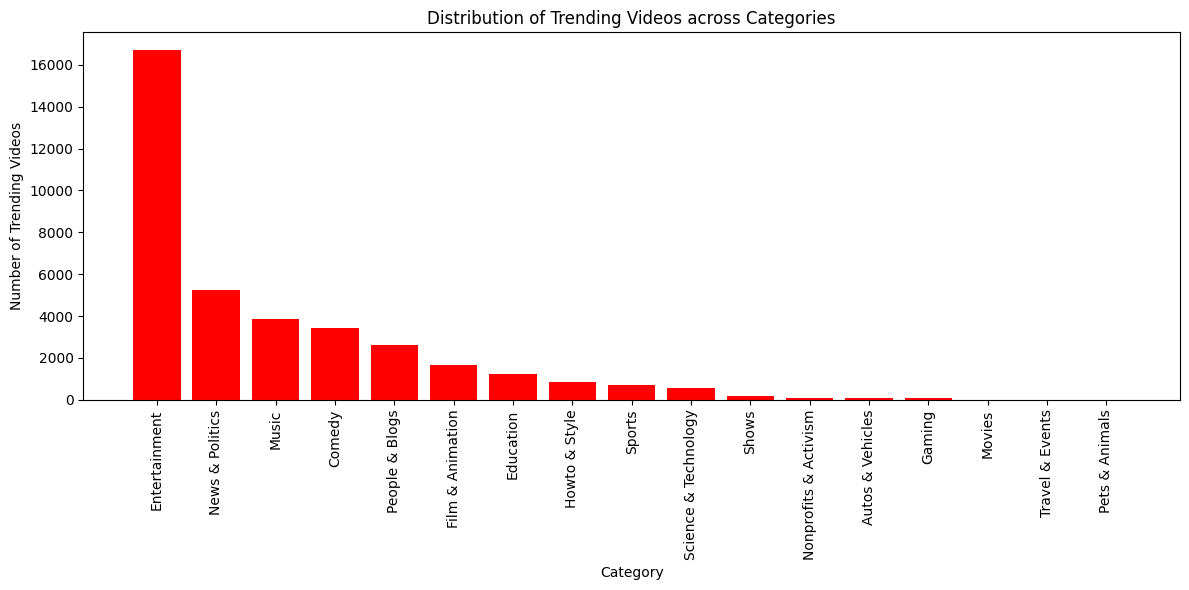

In [9]:
import matplotlib.pyplot as plt

# Group the data by 'category_id' and count the videos in each category
category_counts = df['category_id'].value_counts()

# Sort the categories in descending order of video counts
sorted_categories = category_counts.sort_values(ascending=False)

# Define the category names
category_names = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}

# Create a list of category names corresponding to the sorted categories
sorted_category_names = [category_names[cat_id] for cat_id in sorted_categories.index]

# Create a bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
plt.bar(sorted_category_names, sorted_categories.values,color='red')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Trending Videos')
plt.title('Distribution of Trending Videos across Categories')
plt.tight_layout()
plt.show()


### Insights:
- Entertainment is the most trending category for videos, followed by News & Politics and music.
- The least trending categories for videos are Pets & Animals and Travel & Events.

# <h1 align="center">Popularity Analysis: </h1>

In [10]:
# Sort the DataFrame by views in descending order to find the most viewed videos
most_viewed_videos = df.sort_values('views', ascending=False)

# Sort the DataFrame by likes in descending order to find the most liked videos
most_liked_videos = df.sort_values('likes', ascending=False)

# Sort the DataFrame by comment_count in descending order to find the most commented videos
most_commented_videos = df.sort_values('comment_count', ascending=False)

# Print the details of the most viewed video
most_viewed_video = most_viewed_videos.iloc[0]
print("Most Viewed Video:")
print("Title:", most_viewed_video['title'])
print("Channel:", most_viewed_video['channel_title'])
print("Views:", most_viewed_video['views'])

# Print the details of the most liked video
most_liked_video = most_liked_videos.iloc[0]
print("\nMost Liked Video:")
print("Title:", most_liked_video['title'])
print("Channel:", most_liked_video['channel_title'])
print("Likes:", most_liked_video['likes'])

# Print the details of the most commented video
most_commented_video = most_commented_videos.iloc[0]
print("\nMost Commented Video:")
print("Title:", most_commented_video['title'])
print("Channel:", most_commented_video['channel_title'])
print("Comment Count:", most_commented_video['comment_count'])



Most Viewed Video:
Title: YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Channel: YouTube Spotlight
Views: 125432237

Most Liked Video:
Title: YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Channel: YouTube Spotlight
Likes: 2912710

Most Commented Video:
Title: YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Channel: YouTube Spotlight
Comment Count: 827755


### Insights:
- The most viewed video on YouTube is "YouTube Rewind: The Shape of 2017" by YouTube Spotlight, with 125,432,237 views.
- The most liked video on YouTube is also "YouTube Rewind: The Shape of 2017" by YouTube Spotlight, with 2,912,710 likes.
- The most commented video on YouTube is once again "YouTube Rewind: The Shape of 2017" by YouTube Spotlight, with 827,755 comments.

# <h1 align="center">Trend Analysis over time: </h1>

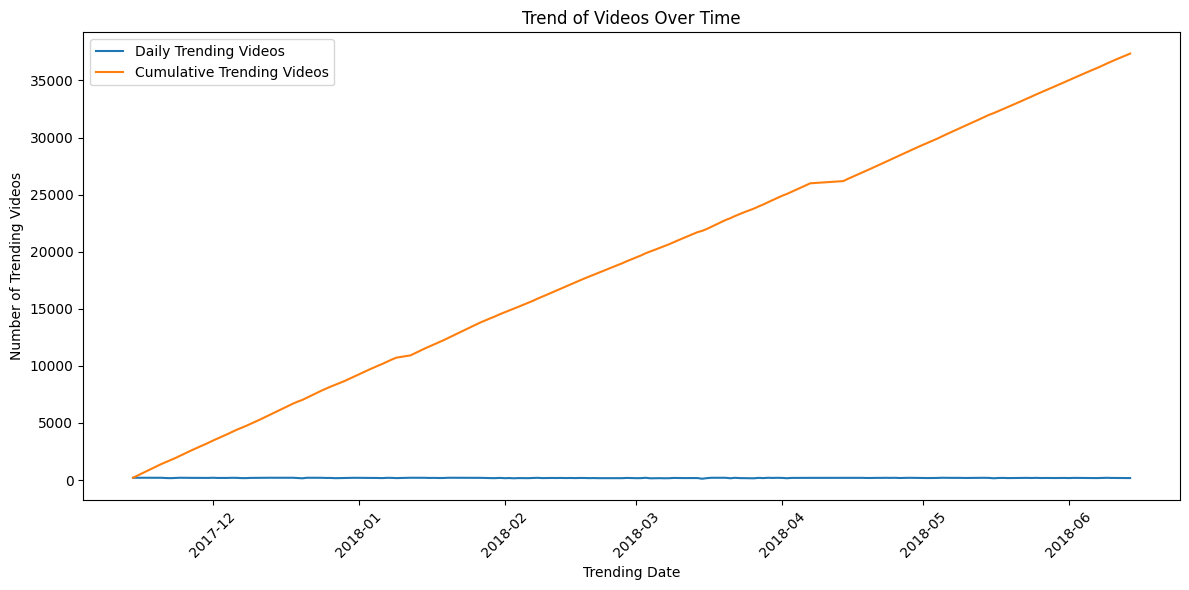

In [21]:
# Group the data by 'trending_date' and count the number of videos trending on each date
trending_counts = df.groupby('trending_date').size()

# Calculate the cumulative sum of trending videos over time
cumulative_trend = trending_counts.cumsum()

# Plot the trend of videos over time
plt.figure(figsize=(12, 6))
plt.plot(trending_counts.index, trending_counts.values, label='Daily Trending Videos')
plt.plot(cumulative_trend.index, cumulative_trend.values, label='Cumulative Trending Videos')
plt.xlabel('Trending Date')
plt.ylabel('Number of Trending Videos')
plt.title('Trend of Videos Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights:
- The number of trending videos continuous increase in the cumulative count of trending videos over time.
- The count of daily trending videos remains constant regardless of the trending date.

# <h1 align="center">Engagement Analysis: </h1>



In [22]:
# Calculate the engagement rate
df['engagement_rate'] = (df['likes'] + df['dislikes'] + df['comment_count']) / df['views']

# Sort the DataFrame by the engagement rate in descending order to find videos with high engagement rates
high_engagement_videos = df.sort_values('engagement_rate', ascending=False)

# Print the details of the video with the highest engagement rate
most_engaging_video = high_engagement_videos.iloc[0]
print("Video with the Highest Engagement Rate:")
print("Title:", most_engaging_video['title'])
print("Channel:", most_engaging_video['channel_title'])
print("Engagement Rate:", most_engaging_video['engagement_rate'])


Video with the Highest Engagement Rate:
Title: OnePlus 6 Top Features and GIVEAWAY 🔥- OnePlus 6 Avengers Edition Giveaway!!🔥
Channel: Technical Guruji
Engagement Rate: 0.7764851134791675


### Insights
- The video with the highest engagement rate is "OnePlus 6 Top Features and GIVEAWAY 🔥- OnePlus 6 Avengers Edition Giveaway!!🔥" by Technical Guruji, with an engagement rate of 0.7764851134791675.

# <h1 align="center">Channel Analysis: </h1>



In [23]:
# Group the data by 'channel_title' and calculate the performance metrics
channel_performance = df.groupby('channel_title').agg({
    'video_id': 'count',  # Number of trending videos
    'views': 'sum',       # Total views
    'likes': 'sum',       # Total likes
    'engagement_rate': 'mean'  # Average engagement rate
})

# Sort the DataFrame by the number of trending videos in descending order
channel_performance = channel_performance.sort_values('video_id', ascending=False)

# Print the top performing channels
print("Top Performing Channels:")
print(channel_performance.head(10))


Top Performing Channels:
                  video_id      views    likes  engagement_rate
channel_title                                                  
VikatanTV              284  201334083  1087340         0.008051
etvteluguindia         282  125546283   680848         0.005485
Flowers Comedy         270  187542891  1403043         0.010042
ETV Plus India         253  125182975   804843         0.009865
SAB TV                 244  101697213   480762         0.006114
RadaanMedia            243   95742030   462126         0.006806
mallemalatv            238  225185301  1490384         0.007978
SET India              238  241255896  2381191         0.009412
ETV Jabardasth         234  354175179  1922527         0.006781
Vijay Television       231  122206759   866104         0.007465


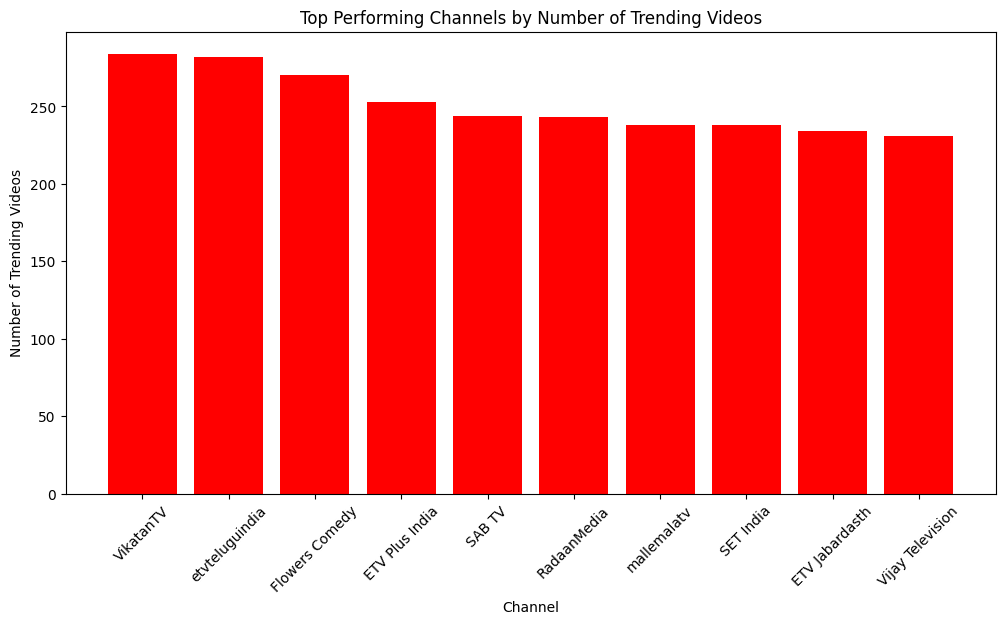

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your channel performance DataFrame is named 'channel_performance'

# Sort the DataFrame by the number of trending videos in descending order
channel_performance = channel_performance.sort_values('video_id', ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(channel_performance.index[:10], channel_performance['video_id'][:10],color='red')
plt.xlabel('Channel')
plt.ylabel('Number of Trending Videos')
plt.title('Top Performing Channels by Number of Trending Videos')
plt.xticks(rotation=45)
plt.show()


### Insights: The top three channels with their respective video IDs and engagement rates are as follows:

- Channel: VikatanTV, Video ID: 284, Engagement Rate: 0.008051
- Channel: etvteluguindia, Video ID: 282, Engagement Rate: 0.005485
- Channel: Flowers Comedy, Video ID: 270, Engagement Rate: 0.010042

# <h1 align="center">Tags Analysis: </h1>

Top 10 Most Frequently Used Tags:
"comedy"          2290
"funny"           2119
"television"      1413
"show"            1399
[none]            1381
"serial"          1327
"full episode"    1303
"daily soap"      1233
"watch online"    1229
"funny videos"    1208
dtype: int64


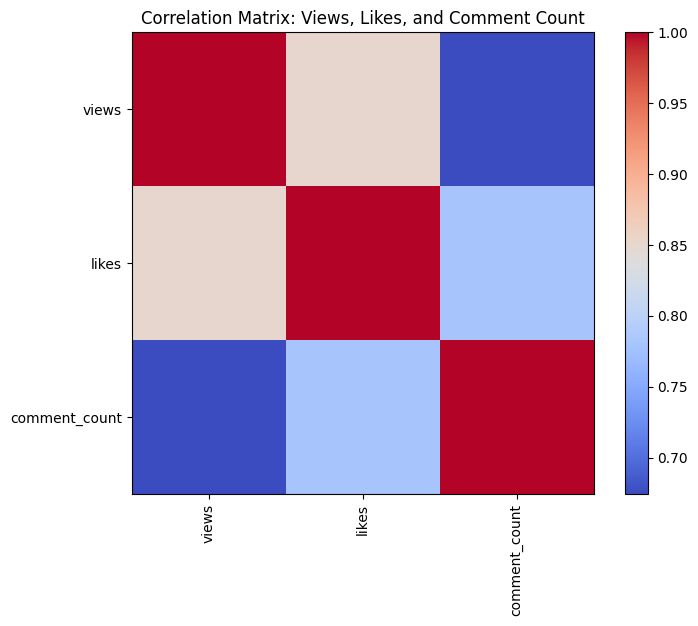

In [25]:
# Extract the tags column and split the tags into individual tags
tags_list = df['tags'].str.split('|')

# Create a list to store all the tags
all_tags = []
for tags in tags_list:
    all_tags.extend(tags)

# Create a pandas Series to count the frequency of each tag
tag_counts = pd.Series(all_tags).value_counts()

# Print the top 10 most frequently used tags
print("Top 10 Most Frequently Used Tags:")
print(tag_counts.head(10))

# Extract relevant columns for correlation analysis
correlation_df = df[['views', 'likes', 'comment_count']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)
plt.title('Correlation Matrix: Views, Likes, and Comment Count')
plt.show()


### Insights: The top 3 most frequently used tags are as follows:
- "comedy" - 2290 occurrences
- "funny" - 2119 occurrences
- "television" - 1413 occurrences
- There is a strong positive covariance between likes and views & likes and comments.

# <h1 align="center">Comments and Ratings Analysis: </h1>

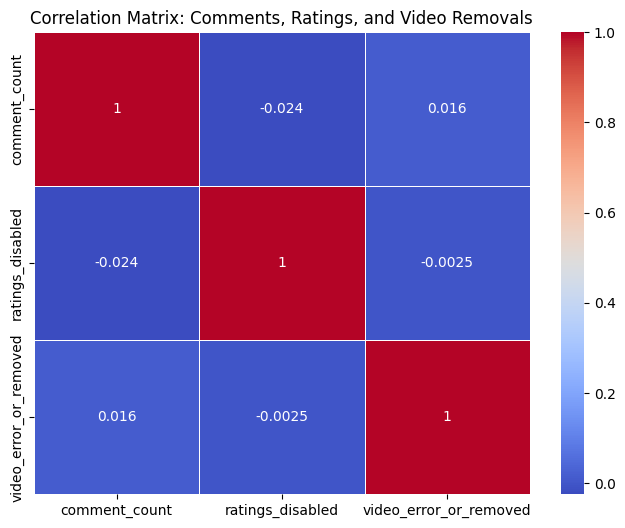

In [26]:
import seaborn as sns

# Extract relevant columns for analysis
comments_ratings_df = df[['comment_count', 'ratings_disabled', 'video_error_or_removed']]

# Calculate the correlation matrix
correlation_matrix = comments_ratings_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Comments, Ratings, and Video Removals')
plt.show()


### Insights:
- There is a positive correlation between the occurrence of video errors or removals and the comment count.
- There is a negative correlation between the comment count and the presence of disabled ratings.

# <h1 align="center">Descriptive Analysis: </h1>

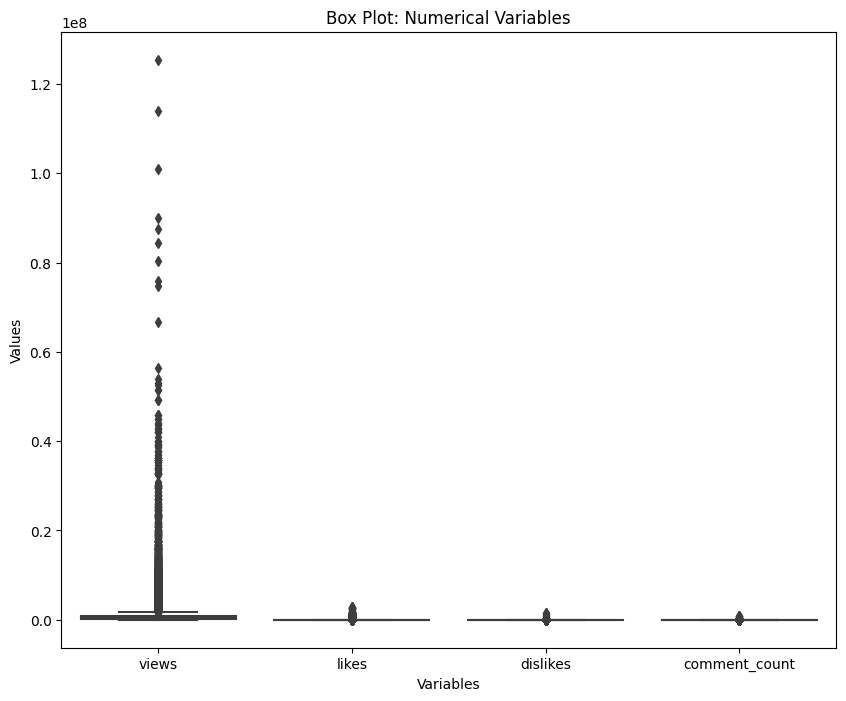

In [27]:
# Extract relevant numerical columns for analysis
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']
numerical_data = df[numerical_columns]

# Plot box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=numerical_data)
plt.title('Box Plot: Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


# Conclusion:
- The dataset contains 37,352 rows and 16 columns, with the "description" column having 561 null values.
- **Entertainment** is the **most trending category**, followed by News & Politics and music, while the least trending categories are Pets & Animals and Travel & Events.
- The **most viewed, liked, and commented video** on YouTube is **"YouTube Rewind: The Shape of 2017"** by YouTube Spotlight.
- The number of **trending videos continuously increases in the cumulative count**, while the count of daily trending videos remains constant.
- The video with the **highest engagement rate** is **"OnePlus 6 Top Features and GIVEAWAY"** by Technical Guruji.
- The **top three channels** with their video IDs and engagement rates are **VikatanTV, etvteluguindia, and Flowers Comedy**.
- The **most frequently used tags** are **"comedy," "funny," and "television."**
- **Likes and views, as well as likes and comments**, show a **strong positive covariance**.
- Video errors or removals have a positive correlation with the comment count, while the comment count has a negative correlation with disabled ratings.

# Message for YouTubers
- Focus on Entertainment, News & Politics, and music categories as they are the most trending categories on YouTube.
- Consider creating content that is engaging and has the potential to gain high views, likes, and comments like "YouTube Rewind: The Shape of 2017" by YouTube Spotlight.
- Aim to increase the engagement rate of your videos, taking inspiration from the high engagement rate of "OnePlus 6 Top Features and GIVEAWAY" by Technical Guruji.
- Pay attention to the tags you use, with "comedy," "funny," and "television" being popular tags that can potentially attract more viewers.
- Understand the positive covariance between likes and views, as well as likes and comments, indicating that higher likes correlate with increased viewership and engagement.
- Be cautious about potential video errors or removals as they may affect the comment count, which has a positive correlation with such incidents.
- Additionally, be aware that disabled ratings can have a negative correlation with the comment count, so consider the impact of disabling ratings on audience interaction.

<div style="text-align:center">
    <img src="https://i.pinimg.com/736x/f7/04/17/f70417ed0a1441a358aee8aa89c7bed4.jpg" alt="Image" />
</div>